In [16]:
### CLUSTER AND CLOUD COMPUTING ASSIGNMENT 2 ###
### TEAM 20 -------------------------------  ###
### Lachlan Rowles (1081611) --------------  ###
### Muhammad Shafaryantoro (1397084) ------  ###
### Vanessa Gracia Tan (1297696) ----------  ###
### Viane Dorthea Tiwa (1413279) ----------  ###
### Muhammad Bayu Prakoso Aji (1696174) ---  ###
### PERSON IN CHARGE: LACHLAN ROWLES

import requests # this is to work with HTTP API requests
import pandas as pd
import matplotlib.pyplot as plt 

# To Start
To be able to run any of these HTTP requests, you need to first establish a port forward by executing the script:

`kubectl port-forward service/router -n fission 9090:80`

## Sentiment over time function

In [17]:
'''
Plots the sentiment over time from the data retrieved by a call to the sentiment API
'''
def plot_sentiment(avg_sent, title):
  avg_sent = avg_sent.json()
  flattened_avg_sent = [
    {
        'date': item['date'],
        'avg_subjectivity': item['avg_subjectivity']['value'],
        'avg_sentiment': item['avg_sentiment']['value']
    }
    for item in avg_sent
    ]
  df = pd.DataFrame(flattened_avg_sent)
  plt.figure(figsize=(20, 6))
  plt.plot(df['date'], df['avg_sentiment'], label="Average sentiment")
  plt.plot(df['date'], df['avg_subjectivity'], label="Average subjectivity")
  plt.xlabel("Date")
  plt.ylabel("Value")
  plt.title(title)
  plt.legend()
  plt.grid(True)
  plt.xticks(range(0, df.shape[0], 5), rotation=90)
  plt.ylim(-0.7, 0.7)
  plt.tight_layout()
  plt.axhline(0, color='black')
  plt.show()

# Sentiment over time
We calculate the average sentiment and subjectivity per day for posts from each platform, with dates ranging from the start of the year until present.

We do so using the API calls to `sentiment`, including the date range after `days` and the platform after `platform`. This triggers the backend function `avg-sentiment`, which aggregates all the data for this given platform into average sentiment and subjectivity per day.

In [18]:
avg_sent_reddit = requests.get('http://127.0.0.1:9090/sentiment/days/2025-01-01/2025-05-13/platform/reddit', timeout=120)

In [19]:
avg_sent_mastodon = requests.get('http://127.0.0.1:9090/sentiment/days/2025-01-01/2025-05-13/platform/mastodon', timeout=120)

In [20]:
avg_sent_bluesky = requests.get('http://127.0.0.1:9090/sentiment/days/2025-01-01/2025-05-13/platform/bluesky', timeout=120)

We then plot these returned values on consistent axes so that we can directly compare the sentiment and subjectivity across the three platforms over time.

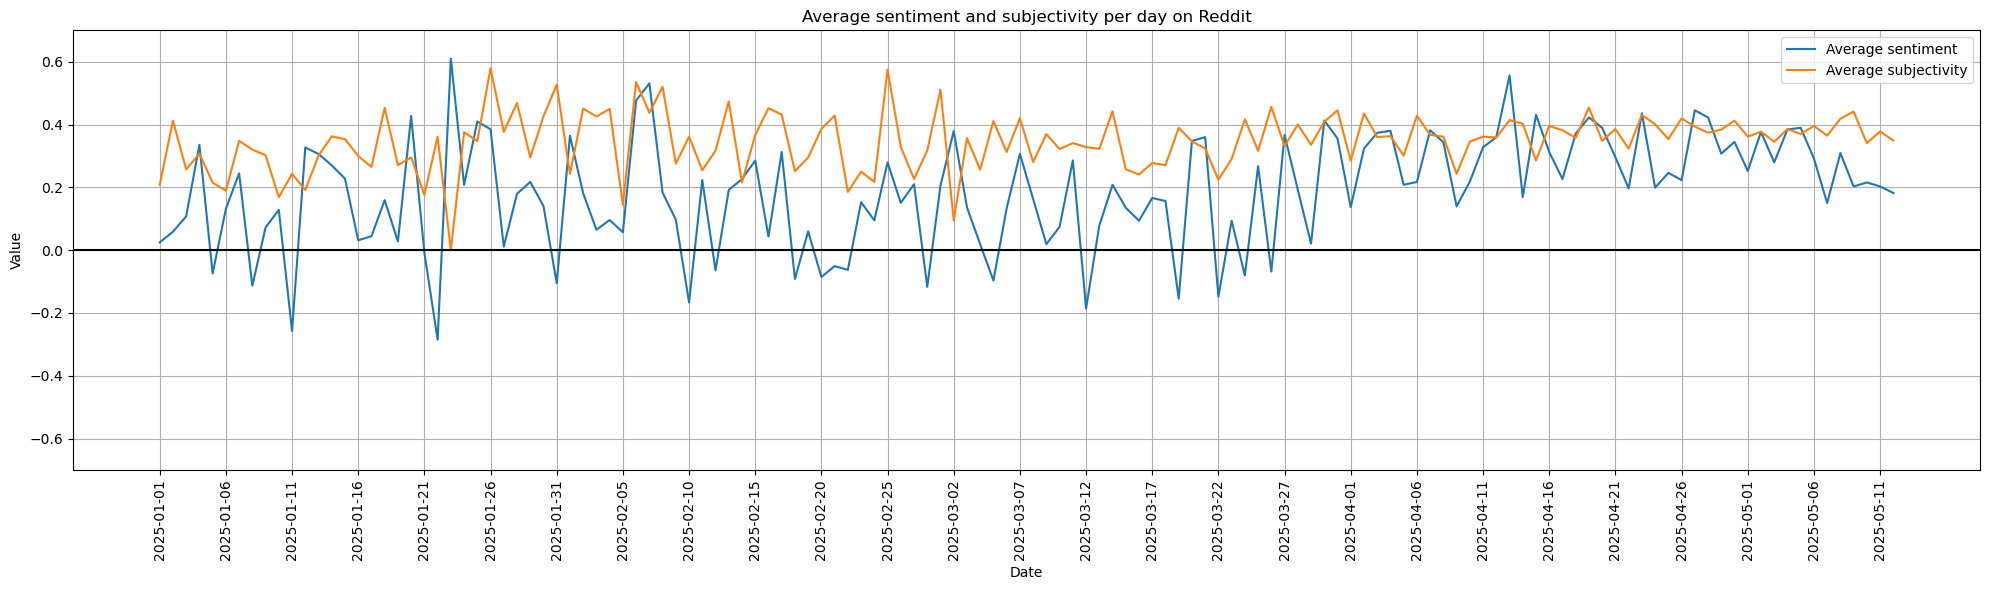

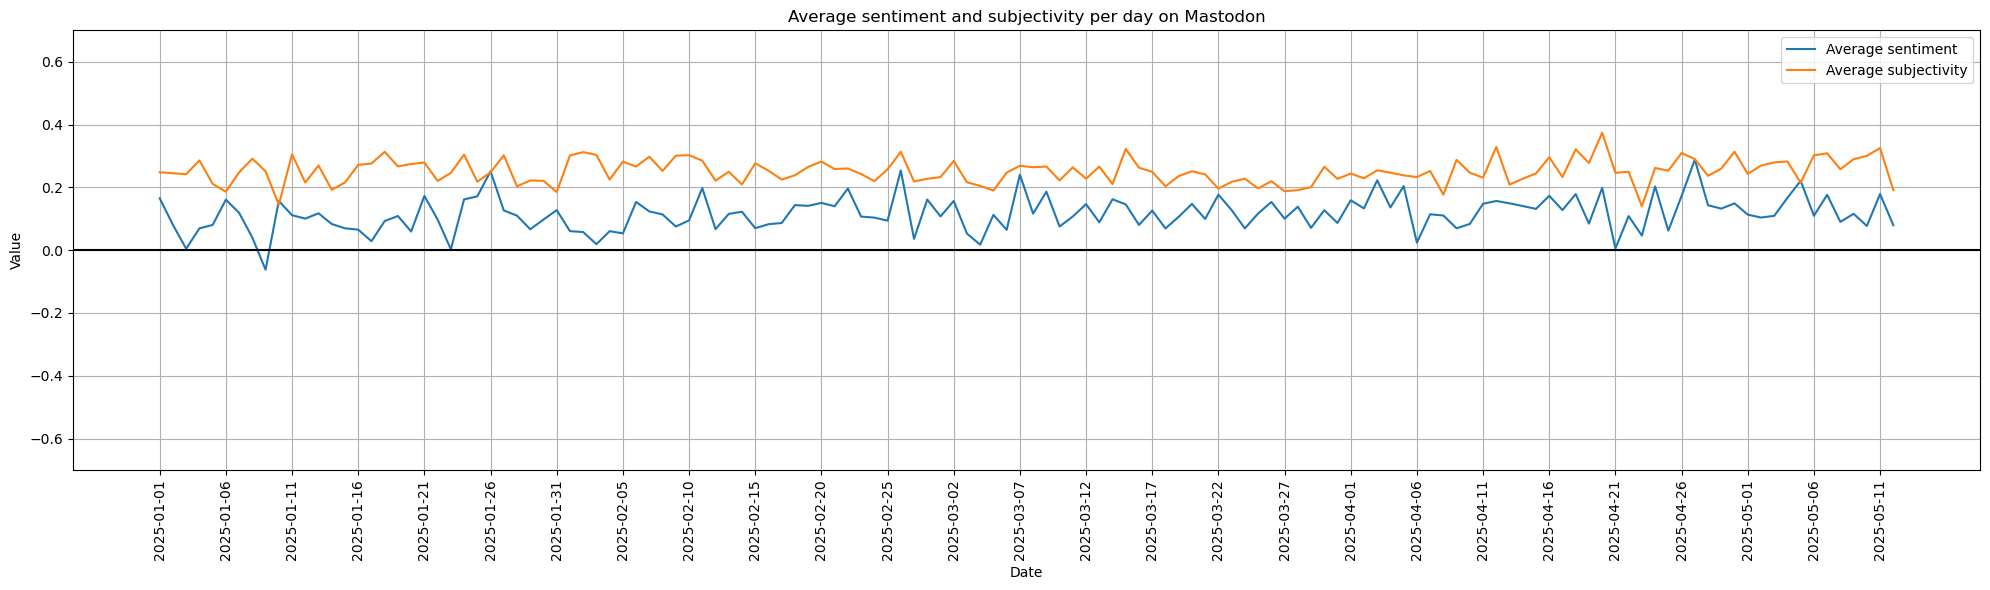

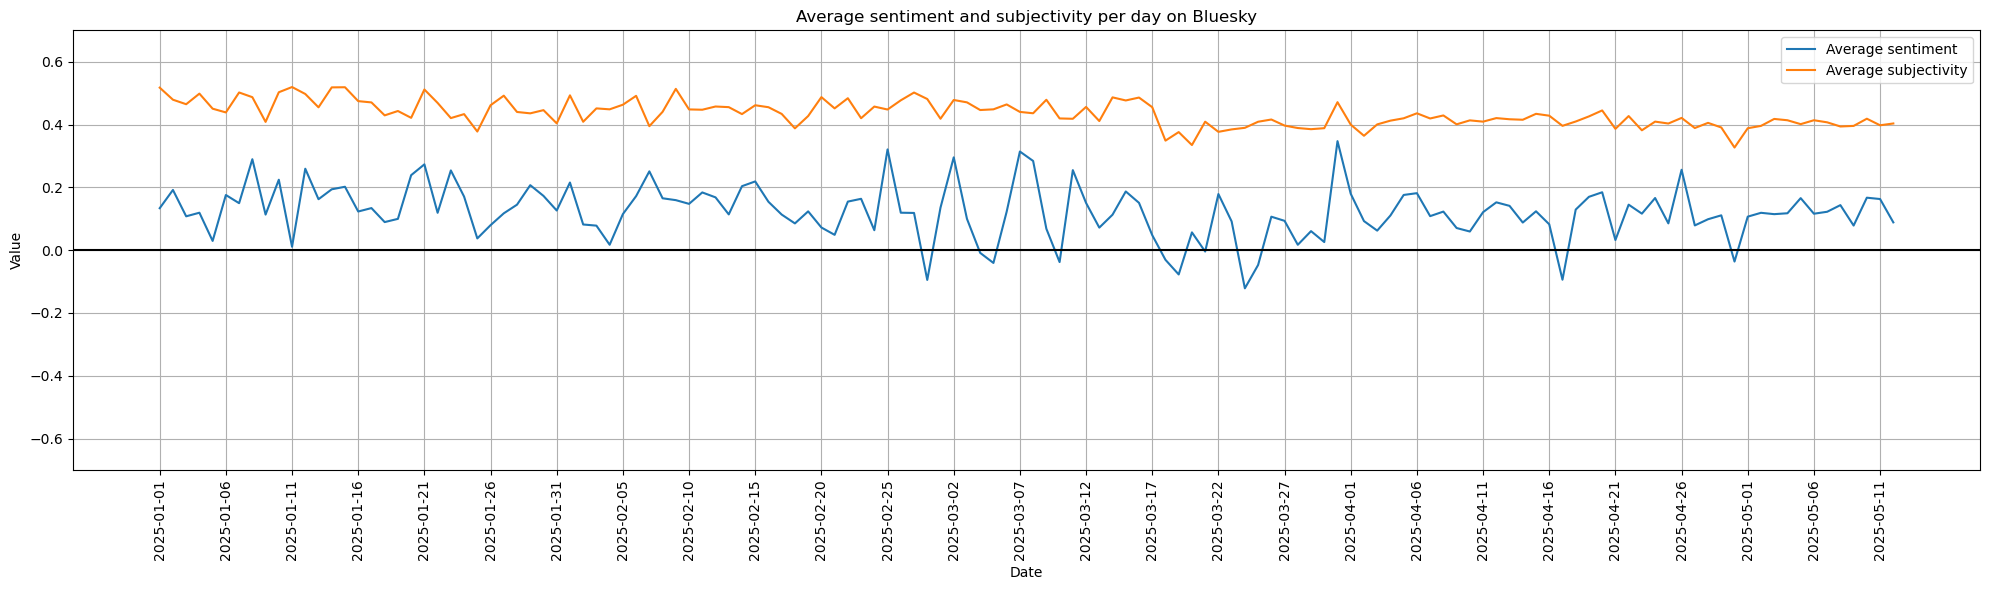

In [21]:
plot_sentiment(avg_sent_reddit, "Average sentiment and subjectivity per day on Reddit")
plot_sentiment(avg_sent_mastodon, "Average sentiment and subjectivity per day on Mastodon")
plot_sentiment(avg_sent_bluesky, "Average sentiment and subjectivity per day on Bluesky")

## WordCloud function

In [22]:
from wordcloud import WordCloud
import numpy as np

'''
Makes a WordCloud from the input which is a list of tuples containing (word, frequency)
'''
def makeImage(input, title):
    freqDict = dict()

    for word in input:
        freqDict[word[0]] = word[1]

    wc = WordCloud(background_color="white")
    # generate word cloud
    wc.generate_from_frequencies(freqDict)

    # show
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

## WordClouds for each platform

To see what topics are most often discussed on each platform, we generate word clouds for all of the posts originating from each platform. 

This is done via an API call to `wordfreq`, specifying the platform after `platform` in the HTTP request. This triggers a function on the backend called `word-frequency`, which creates a frequency count for each word found in the set of posts from the given platform. It then returns the 300 most frequent words, along with their frequencies.

In [23]:
word_freq_reddit = requests.get('http://127.0.0.1:9090/wordfreq/platform/reddit', timeout=120)

In [24]:
word_freq_mast = requests.get('http://127.0.0.1:9090/wordfreq/platform/mastodon', timeout=120)

In [25]:
word_freq_blsky = requests.get('http://127.0.0.1:9090/wordfreq/platform/bluesky', timeout=120)

We then plot these frequencies using a WordCloud

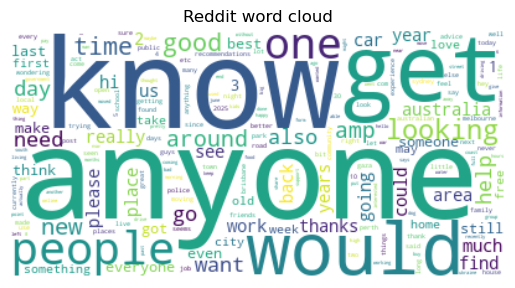

In [26]:
makeImage(word_freq_reddit.json(), "Reddit word cloud")

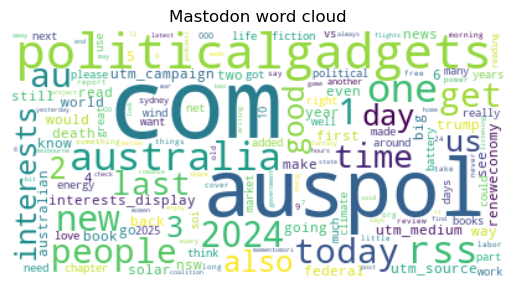

In [ ]:
makeImage(word_freq_mast.json(), "Mastodon word cloud")

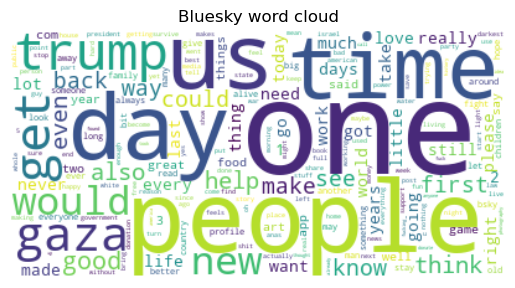

In [ ]:
makeImage(word_freq_blsky.json(), "Bluesky word cloud")

## Term-associated sentiment function

In [27]:
'''
Plots a bar graph for the given input retrieved from a call to the gaza-ukraine API
Includes the sentiment and subjectivity score for the 4 terms: "Gaza", "Israel",
"Ukraine", "Russia" on a single social media platform.
'''
def plotGazaUkraine(input, title):
  avg_sent = input.json()
  barWidth = 0.25
  fig = plt.subplots(figsize =(12, 8)) 

  flattened_avg_sent = [
    {
        'term': item['term'],
        'avg_subjectivity': item['avg_subjectivity']['value'],
        'avg_sentiment': item['avg_sentiment']['value']
    }
    for item in avg_sent
    ]
  br1 = np.arange(len(flattened_avg_sent)) 
  br2 = [x + barWidth for x in br1]
  plt.bar(br1, [x['avg_subjectivity'] for x in flattened_avg_sent], color ='r',
           width = barWidth, edgecolor ='grey', label ='Average subjectivity') 
  plt.bar(br2, [x['avg_sentiment'] for x in flattened_avg_sent], color ='g', 
          width = barWidth, edgecolor ='grey', label ='Average sentiment') 
  
  plt.xlabel('Term', fontweight ='bold', fontsize = 15) 
  plt.ylabel('Vader score', fontweight ='bold', fontsize = 15) 

  plt.xticks([r + barWidth for r in range(len(flattened_avg_sent))], 
        [x['term'] for x in flattened_avg_sent])
  
  plt.ylim(-0.5, 0.5)
  plt.title(title)

  plt.legend()
  plt.show()

# Sentiment and subjectivity of posts containing certain keywords

We determine the average sentiment and subjectivity of posts from a given platform containing certain keywords: "Gaza", "Israel", "Ukraine", "Russia".

To do this, we make an API call to `gaza-ukraine`, giving the desired platform after `platform` in the HTTP request. This will trigger a backend function `gaza-ukraine-sent` which which collects all of the posts from the given platform containing each keyword, and computes the average sentiment and subjectivity of those posts, returning them in a dictionary.

In [28]:
gaza_ukraine_bluesky = requests.get('http://127.0.0.1:9090/gaza-ukraine/platform/bluesky', timeout=120)

In [29]:
gaza_ukraine_reddit = requests.get('http://127.0.0.1:9090/gaza-ukraine/platform/reddit', timeout=120)

In [30]:
gaza_ukraine_mastodon = requests.get('http://127.0.0.1:9090/gaza-ukraine/platform/mastodon', timeout=120)

We then plot each of these average sentiments and subjectivities across the terms for each paltform, with the axes standardised so that we can easily compare between platforms.

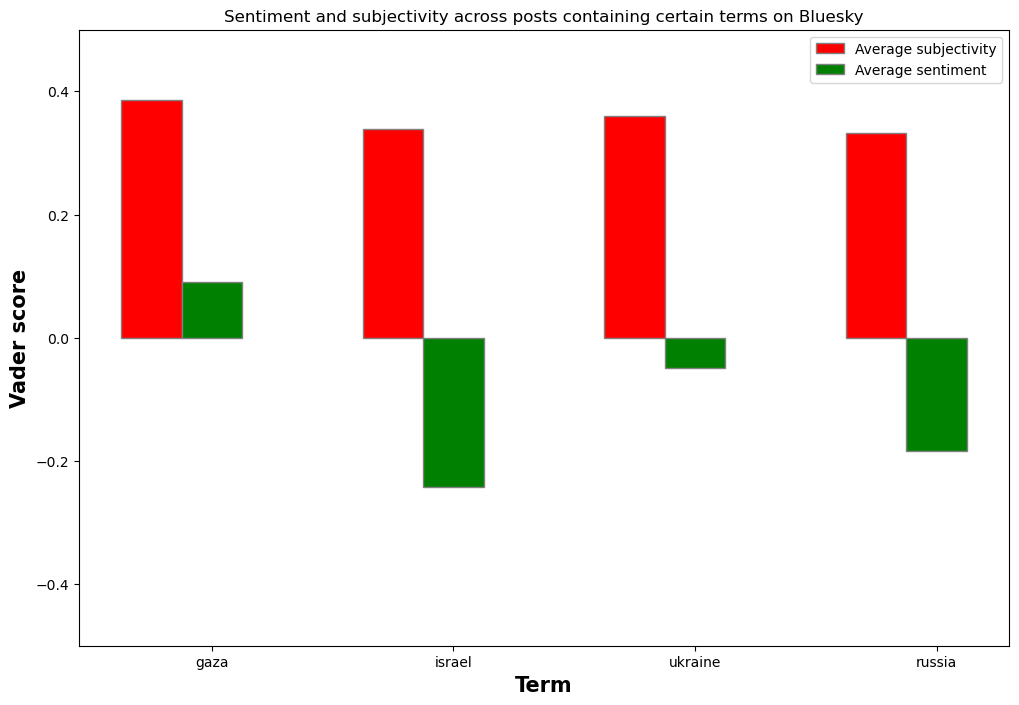

In [33]:
plotGazaUkraine(gaza_ukraine_bluesky, "Sentiment and subjectivity across posts containing certain terms on Bluesky")

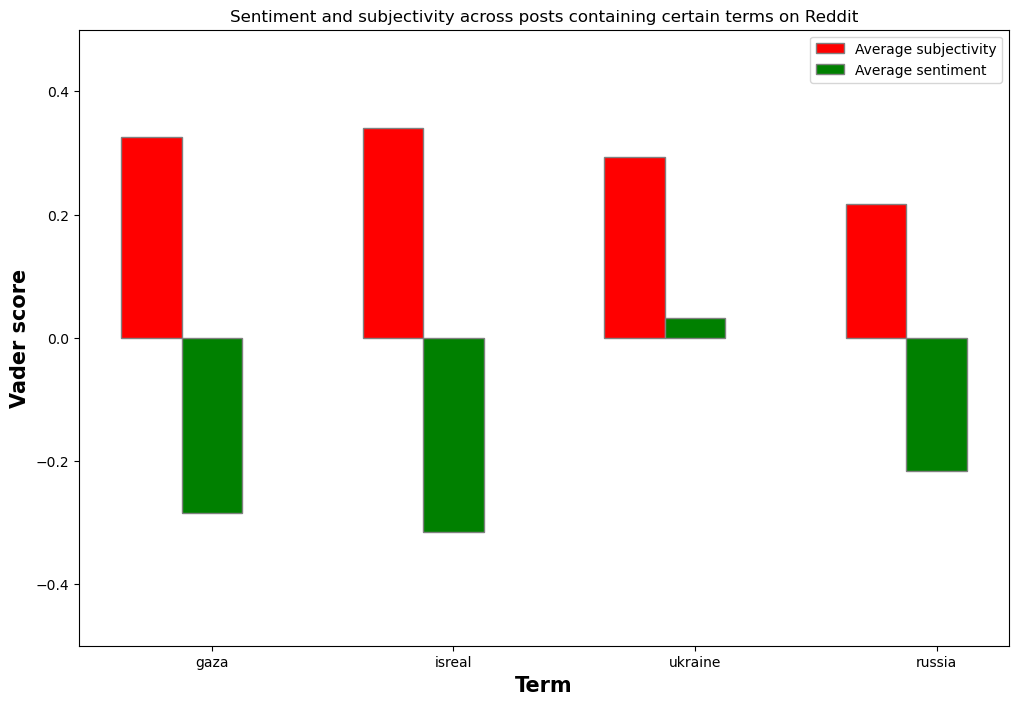

In [93]:
plotGazaUkraine(gaza_ukraine_reddit, "Sentiment and subjectivity across posts containing certain terms on Reddit")

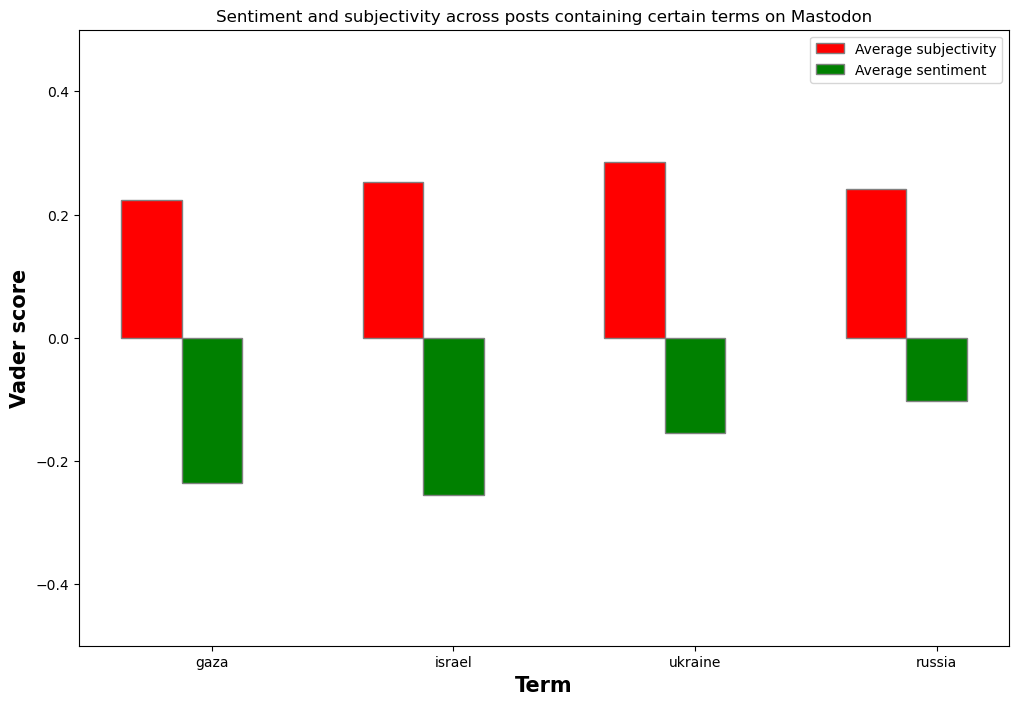

In [32]:
plotGazaUkraine(gaza_ukraine_mastodon, "Sentiment and subjectivity across posts containing certain terms on Mastodon")

# WordCloud for given terms

In our final step of the analysis, we combine some concepts already seen, plotting a WordCloud for each term on each platform. This gives us an idea of the sorts of words used in conjunction with the given terms on each platform, to see what sorts of conversations tend to surround these topics. The terms used in this analysis are again: "Gaza", "Israel", "Ukraine", "Russia".

In [34]:
wc_reddit_terms = requests.get("http://localhost:9090/wordfreq/platform/reddit/useterms/t", timeout=120)

In [35]:
wc_mastodon_terms = requests.get("http://localhost:9090/wordfreq/platform/mastodon/useterms/t", timeout=120)

In [36]:
wc_bluesky_terms = requests.get("http://localhost:9090/wordfreq/platform/bluesky/useterms/t", timeout=120)

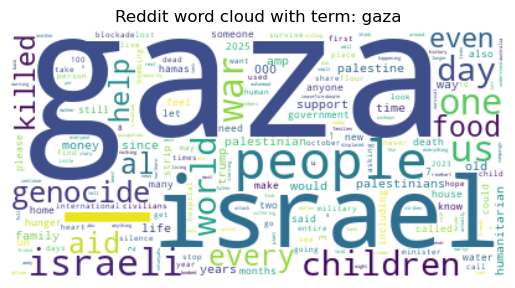

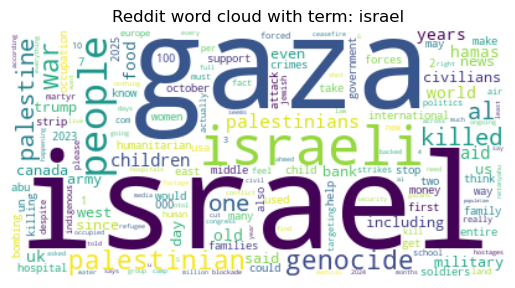

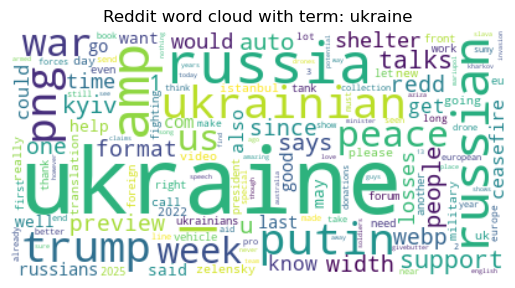

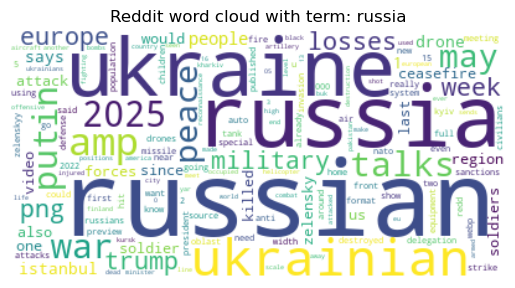

In [13]:
reddit_terms = wc_reddit_terms.json()
for term in reddit_terms.keys():
  makeImage(reddit_terms[term], f'Reddit word cloud with term: {term}')

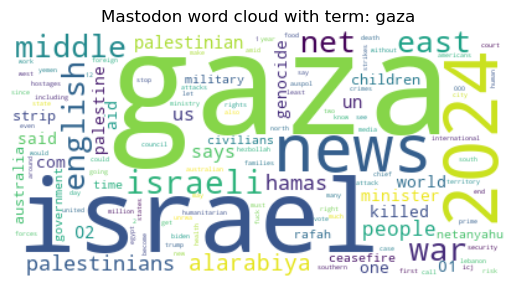

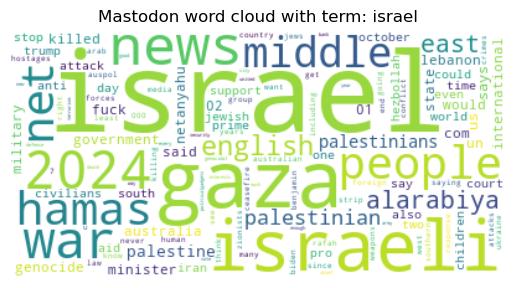

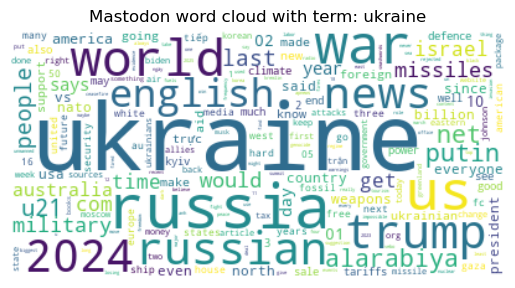

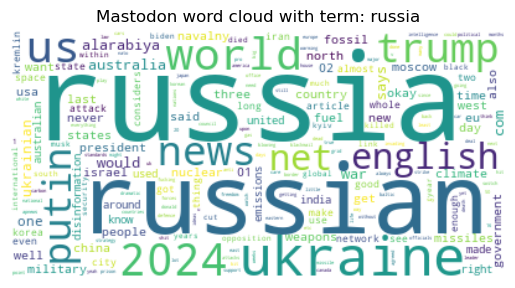

In [14]:
mastodon_terms = wc_mastodon_terms.json()
for term in mastodon_terms.keys():
  makeImage(mastodon_terms[term], f'Mastodon word cloud with term: {term}')

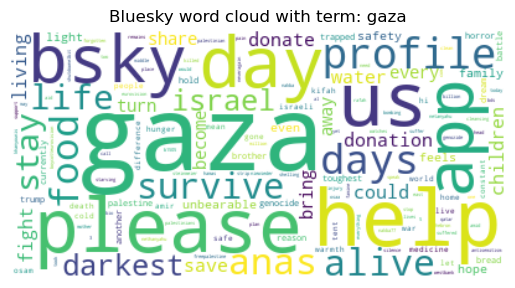

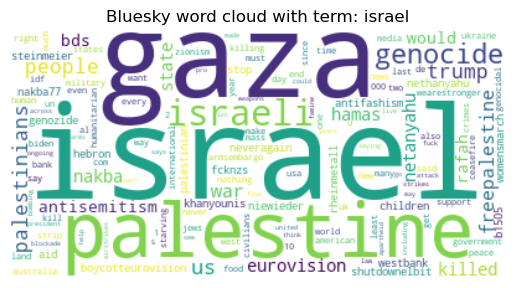

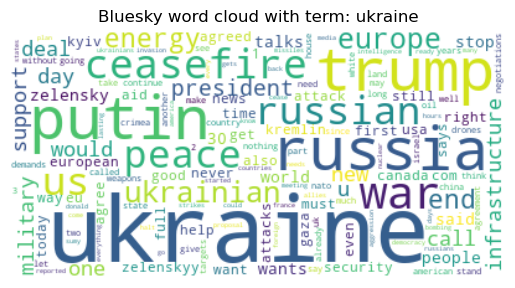

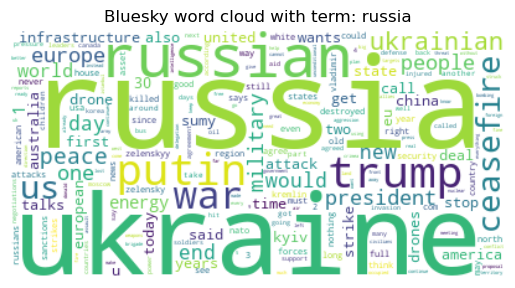

In [15]:
bluesky_terms = wc_bluesky_terms.json()
for term in bluesky_terms.keys():
  makeImage(bluesky_terms[term], f'Bluesky word cloud with term: {term}')